# Numpy -  multidimensional data arrays

## Functions for extracting data from arrays and creating arrays

In [154]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

### Mask

In [155]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [156]:
x < 3  # less than

array([ True,  True, False, False, False])

In [157]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [158]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [159]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])


| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

In [160]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [161]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Counting entries


In [162]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [163]:
np.sum(x < 6)

8

In [164]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [165]:
# are there any values greater than 8?
np.any(x > 8)

True

In [166]:
# are there any values less than zero?
np.any(x < 0)

False

In [167]:
# are all values equal to 6?
np.all(x == 6)

False

### Boolean operators
 ``&``, ``|``, ``^``, and ``~``

In [168]:
x = np.array([1, 2, 3, 4, 5])

In [169]:
# x > 1 and x < 4

In [170]:
(x > 1) & (x < 4)

array([False,  True,  True, False, False])

In [171]:
np.sum((x > 1) & (x < 4))

2

### where

The index mask can be converted to position index using the `where` function

In [172]:
A = array([[n+m*10 for n in range(5)] for m in range(5)])
M = random.rand(3 ,3)
x = arange(0, 10, 0.5)
mask = (5 < x) * (x < 7.5)
indices = where(mask)

indices

(array([11, 12, 13, 14], dtype=int64),)

In [173]:
x[indices] # this indexing is equivalent to the fancy indexing x[mask]

array([5.5, 6. , 6.5, 7. ])

### diag

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [174]:
diag(A)

array([ 0, 11, 22, 33, 44])

In [175]:
diag(A, -1)

array([10, 21, 32, 43])

### take

The `take` function is similar to fancy indexing described above:

In [176]:
v2 = arange(-3,3)
v2

array([-3, -2, -1,  0,  1,  2])

In [177]:
row_indices = [1, 3, 5]
v2[row_indices] # fancy indexing

array([-2,  0,  2])

In [178]:
v2.take(row_indices)

array([-2,  0,  2])

But `take` also works on lists and other objects:

In [179]:
take([-3, -2, -1,  0,  1,  2], row_indices)

array([-2,  0,  2])

### choose

Constructs an array by picking elements from several arrays:

In [180]:
which = [1, 0, 1, 0]
choices = [[-2,-2,-2,-2], [5,5,5,5]]

choose(which, choices)

array([ 5, -2,  5, -2])

## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [181]:
v1 = arange(0, 5)

In [182]:
v1 * 2

array([0, 2, 4, 6, 8])

In [183]:
v1 + 2

array([2, 3, 4, 5, 6])

In [184]:
A * 2, A + 2

(array([[ 0,  2,  4,  6,  8],
        [20, 22, 24, 26, 28],
        [40, 42, 44, 46, 48],
        [60, 62, 64, 66, 68],
        [80, 82, 84, 86, 88]]),
 array([[ 2,  3,  4,  5,  6],
        [12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26],
        [32, 33, 34, 35, 36],
        [42, 43, 44, 45, 46]]))

In [185]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2) # exponentiation
print("x % 2  = ", x % 2) # modulus

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [186]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [187]:
np.multiply(A, A)

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

In [188]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [189]:
A.shape, v1.shape

((5, 5), (5,))

In [190]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

### Absolute value

In [191]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [192]:
dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [193]:
dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [194]:
dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [195]:
M = matrix(A)
v = matrix(v1).T # make it a column vector

In [196]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [197]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [198]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [199]:
v.T

matrix([[0, 1, 2, 3, 4]])

In [200]:
# inner product
v.T * v

matrix([[30]])

In [201]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [202]:
v = matrix([1,2,3,4,5,6]).T

In [203]:
shape(M), shape(v)

((5, 5), (6, 1))

In [204]:
# M * v

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

## Fast Sorting in NumPy: ``np.sort`` and ``np.argsort``

In [205]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [206]:
x

array([2, 1, 4, 3, 5])

In [207]:
x.sort()
x

array([1, 2, 3, 4, 5])

In [208]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


### Sorting along rows or columns

In [209]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [210]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [211]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Trigonometric functions


In [212]:
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]
x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


### Exponents and logarithms


In [213]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]
x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [214]:
C = matrix([[1j, 2j], [3j, 4j]])
C

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [215]:
conjugate(C)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [216]:
C.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [217]:
real(C) # same as: C.real

matrix([[0., 0.],
        [0., 0.]])

In [218]:
imag(C) # same as: C.imag

matrix([[1., 2.],
        [3., 4.]])

Or the complex argument and absolute value

In [219]:
angle(C+1) # heads up MATLAB Users, angle is used instead of arg

matrix([[0.78539816, 1.10714872],
        [1.24904577, 1.32581766]])

In [220]:
abs(C)

matrix([[1., 2.],
        [3., 4.]])

### Matrix computations

#### Inverse

In [221]:
linalg.inv(C) # equivalent to C.I 

matrix([[0.+2.j , 0.-1.j ],
        [0.-1.5j, 0.+0.5j]])

In [222]:
C.I * C

matrix([[1.00000000e+00+0.j, 0.00000000e+00+0.j],
        [1.11022302e-16+0.j, 1.00000000e+00+0.j]])

#### Determinant

In [223]:
linalg.det(C)

(2.0000000000000004+0j)

In [224]:
linalg.det(C.I)

(0.49999999999999967+0j)

### Data processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties from the Stockholm temperature dataset used above.

In [225]:
# reminder, the tempeature dataset is stored in the data variable:
data = genfromtxt('stockholm_td_adj.dat')
shape(data)

(77431, 7)

#### mean

In [226]:
# the temperature data is in column 3
mean(data[:,3])

6.197109684751585

The daily mean temperature in Stockholm over the last 200 years has been about 6.2 C.

#### standard deviations and variance

In [227]:
std(data[:,3]), var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### min and max

In [228]:
# lowest daily average temperature
data[:,3].min()

-25.8

In [229]:
# highest daily average temperature
data[:,3].max()

28.3

In [230]:
data.min(axis=0)

array([ 1.80e+03,  1.00e+00,  1.00e+00, -2.58e+01, -2.58e+01, -2.58e+01,
        1.00e+00])

In [231]:
data.min(axis=1)

array([ -6.1, -15.4, -15. , ...,   1. ,  -0.1,  -3.3])

## Example: What is the Average Height of US Presidents?

In [232]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [233]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [234]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


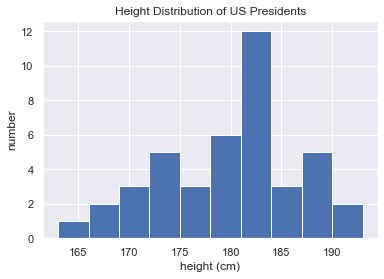

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

## Exercise_4_Statistics_and_random_sampling

#### sum, prod, and trace

In [236]:
d = arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [237]:
# sum up all elements
sum(d)

45

In [238]:
# product of all elements
prod(d+1)

3628800

In [239]:
# cummulative sum
cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [240]:
# cummulative product
cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800], dtype=int32)

In [241]:
# same as: diag(A).sum()
trace(A)

110

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc. are applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [242]:
m = random.rand(3,3)
m

array([[0.74412165, 0.03936839, 0.67837988],
       [0.04964576, 0.63748415, 0.12602625],
       [0.98863313, 0.2599548 , 0.2752507 ]])

In [243]:
# global max
m.max()

0.9886331345892517

In [244]:
# max in each column
m.max(axis=0)

array([0.98863313, 0.63748415, 0.67837988])

In [245]:
# max in each row
m.max(axis=1)

array([0.74412165, 0.63748415, 0.98863313])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified without copying the underlaying data, which makes it a fast operation even for large arrays.

In [246]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [247]:
n, m = A.shape

In [248]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [249]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

In [250]:
A # and the original variable is also changed. B is only a different view of the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [251]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [252]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [253]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [254]:
v = array([1,2,3])

In [255]:
shape(v)

(3,)

In [256]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [257]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [258]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Broadcasting


In [259]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (a zero-dimensional array) to an array:

In [260]:
a + 5

array([5, 6, 7])

In [261]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [262]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [263]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [264]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [265]:
a = np.arange(18).reshape(6,3)
b = np.arange(1,4)

unrelated shapes

In [266]:
# a * np.array([10,20])


# ValueError: operands could not be broadcast together with shapes (6,4) (2,) 

If the last dimension(s) size(s) are equal, numpy will **broadcast** the smaller array across all other dimensions: 

In [267]:
a*b

array([[ 0,  2,  6],
       [ 3,  8, 15],
       [ 6, 14, 24],
       [ 9, 20, 33],
       [12, 26, 42],
       [15, 32, 51]])

this is the same as operating on the following 6x4 array:

In [268]:
a * np.array([
    b,
    b,
    b,
    b,
    b,
    b,
])

array([[ 0,  2,  6],
       [ 3,  8, 15],
       [ 6, 14, 24],
       [ 9, 20, 33],
       [12, 26, 42],
       [15, 32, 51]])

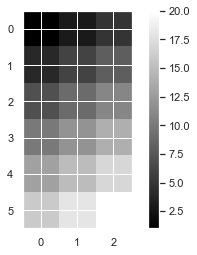

In [269]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(a + b, 'gray')
plt.colorbar();

## Numpy-broadcasting-exercise

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [270]:
a = array([[1, 2], [3, 4]])

In [271]:
# repeat each element 3 times
repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [272]:
# tile the matrix 3 times 
tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [273]:
b = array([[5, 6]])

In [274]:
concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [275]:
concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [276]:
vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [277]:
hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [278]:
A = array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [279]:
# now B is referring to the same array data as A 
B = A 

In [280]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [281]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [282]:
B = copy(A)

In [283]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [284]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [285]:
v = array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [286]:
M = array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [287]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [288]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [289]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [290]:
# Theta(array([-3,-2,-1,0,1,2,3]))

# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-244-2cb2062a7e18> in <module>
# ----> 1 Theta(array([-3,-2,-1,0,1,2,3]))

# <ipython-input-243-f72d7f42be84> in Theta(x)
#       3     Scalar implemenation of the Heaviside step function.
#       4     """
# ----> 5     if x >= 0:
#       6         return 1
#       7     else:

# ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [291]:
Theta_vec = vectorize(Theta)

In [292]:
Theta_vec(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [293]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [294]:
Theta(array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [295]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [296]:
M

array([[ 1,  4],
       [ 9, 16]])

In [297]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [298]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [299]:
M.dtype

dtype('int32')

In [300]:
M2 = M.astype(float)
M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [301]:
M2.dtype

dtype('float64')

In [302]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [ True,  True]])

## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.